--- Initial Data Shape ---
(2050, 4)
---missing values---
Name              17
Class              0
Total_Marks        0
Obtained_Marks     0
dtype: int64

--- Class Performance Summary ---
       Total_Marks  Obtained_Marks   Percentage
count  1983.000000     1983.000000  1983.000000
mean     59.430156       39.899143    73.243066
std      31.375755       21.451584    21.328066
min      25.000000       20.000000    20.000000
25%      25.000000       23.000000    58.000000
50%      50.000000       32.000000    80.000000
75%     100.000000       48.000000    90.500000
max     100.000000      100.000000   100.000000

--- Performance by class ---
                mean  max  count
Class                           
6th Grade  39.071848  100    682
7th Grade  40.404288  100    653
8th Grade  40.260802  100    648

Project Complete: Data exported.


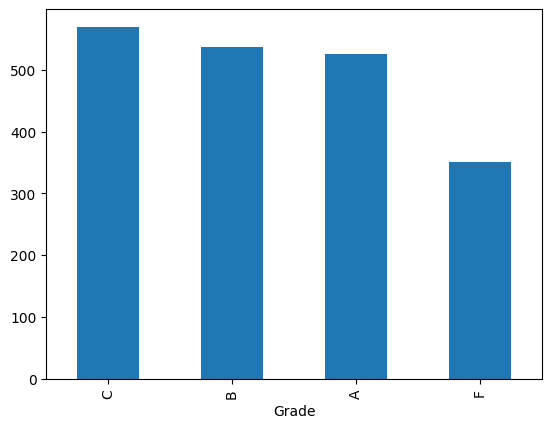

In [11]:
# Project: Student Performance Analysis
# Description: Cleaning and analyzing student exam scores to determine grades and performance trends.

import pandas as pd

# 1. Data Loading & Inspection
try:
    df = pd.read_csv("student_exam_scores.csv")
except FileNotFoundError:
  print("CSV not found.")
else:
  print("--- Initial Data Shape ---")
  print(df.shape)

  # 2. Data Cleaning

  # check missing values
  print("---missing values---")
  print(df.isna().sum())

  # Handling missing values
  df=df.dropna(subset=["Name"])  # Remove rows with missing marks
  df=df.drop_duplicates()                    # Remove duplicate rows

  # 3. Feature Engineering
  # Calculate Percentage
  df["Percentage"] = (df["Obtained_Marks"] / df["Total_Marks"]) * 100

  # Assign Grades using a custom function
  def assign_grade(marks):
    if marks >= 90:
        return "A"
    elif marks >= 80:
        return "B"
    elif marks >= 50:
        return "C"
    else:
        return "F"

  df["Grade"] = df["Percentage"].apply(assign_grade)

  # 4. Statistical Analysis
  print("\n--- Class Performance Summary ---")
  print(df.describe())

  # 5. Group Analysis
  # Comparing performance between classes
  Class_performance = df.groupby("Class")["Obtained_Marks"].agg(["mean", "max", "count"])
  print("\n--- Performance by class ---")
  print(Class_performance)
  df['Grade'].value_counts().plot(kind='bar')

# 6. Export Cleaned Data
df.to_csv("cleaned_student_performance.csv", index=False)
print("\nProject Complete: Data exported.")